In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
calories = pd.read_csv('calories.csv')

exercise = pd.read_csv('exercise.csv')

In [3]:
calories

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [4]:
exercise

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [5]:
dataset = exercise.merge(right = calories , on = "User_ID" )

In [6]:
dataset

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [8]:
dataset.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [10]:
pd.DataFrame({'columns': dataset.columns,'sum': dataset.isnull().sum() , "Null percentage" : dataset.isnull().sum()/(len(dataset)*100)})

,columns,sum,Null percentage
User_ID,User_ID,0,0.0
Gender,Gender,0,0.0
Age,Age,0,0.0
Height,Height,0,0.0
Weight,Weight,0,0.0
Duration,Duration,0,0.0
Heart_Rate,Heart_Rate,0,0.0
Body_Temp,Body_Temp,0,0.0
Calories,Calories,0,0.0


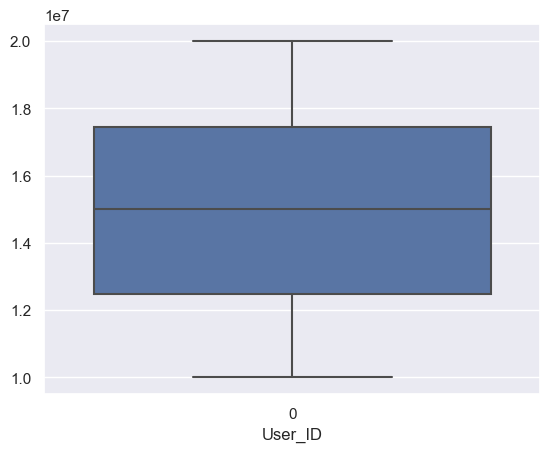

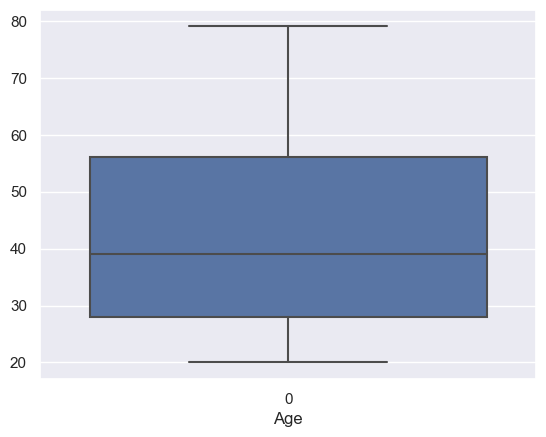

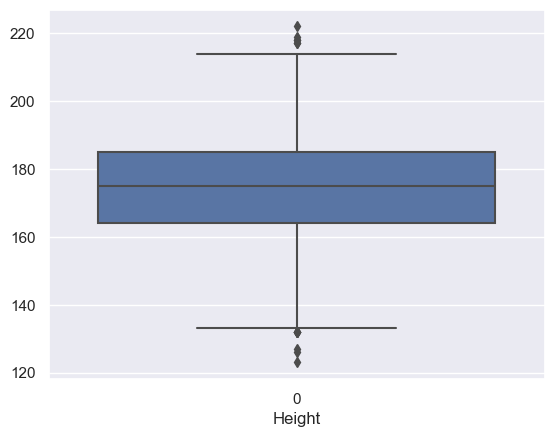

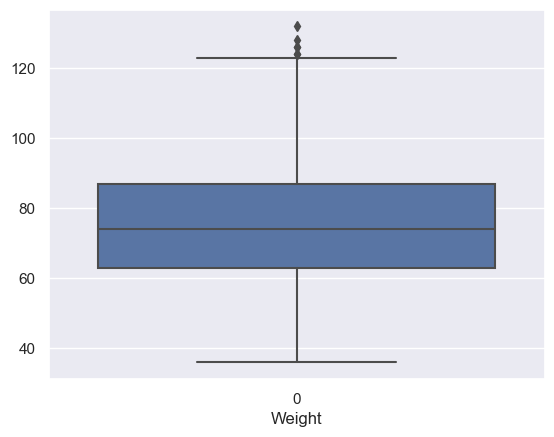

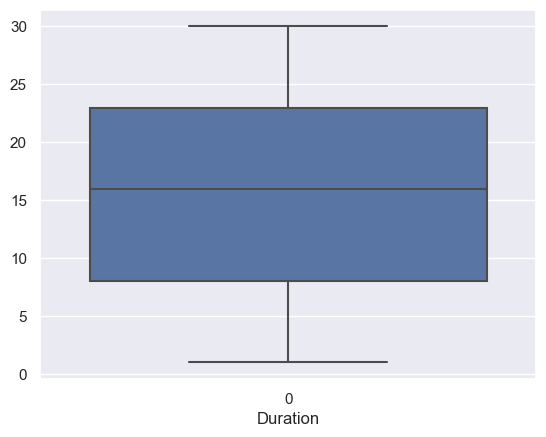

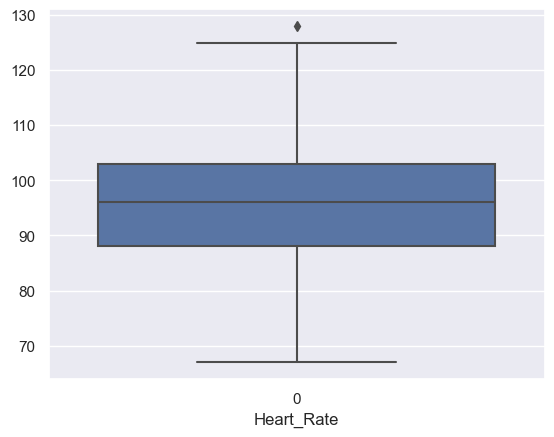

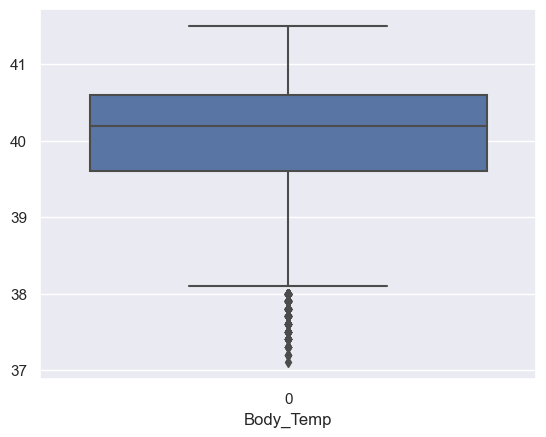

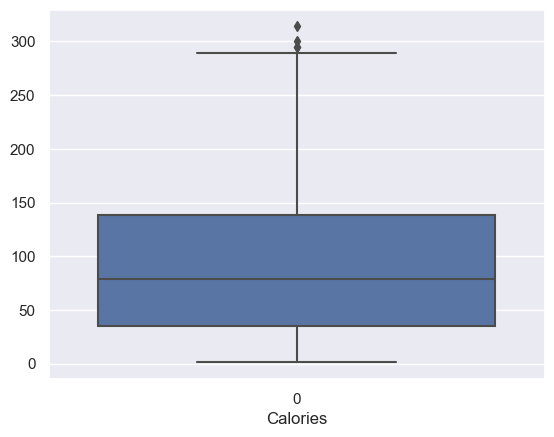

In [13]:
def outlier(col):
    sns.boxplot(dataset[col])
    plt.xlabel(col)
    plt.show()
    
for col in dataset.select_dtypes(exclude='object').columns:
    outlier(col)

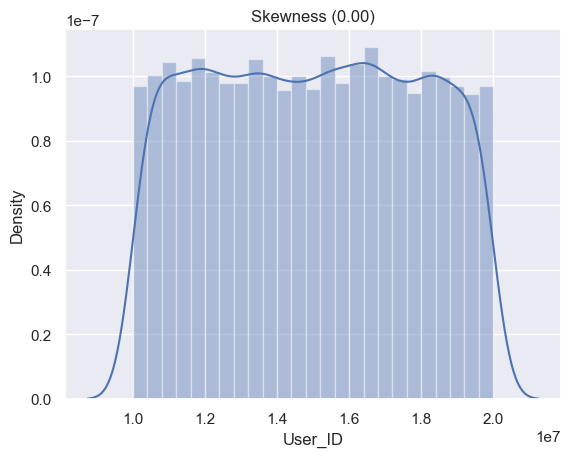

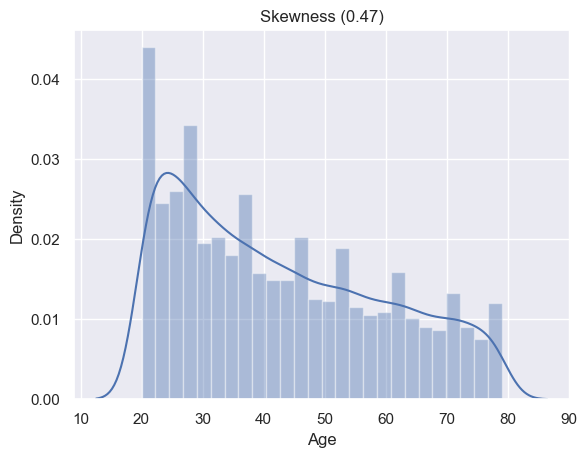

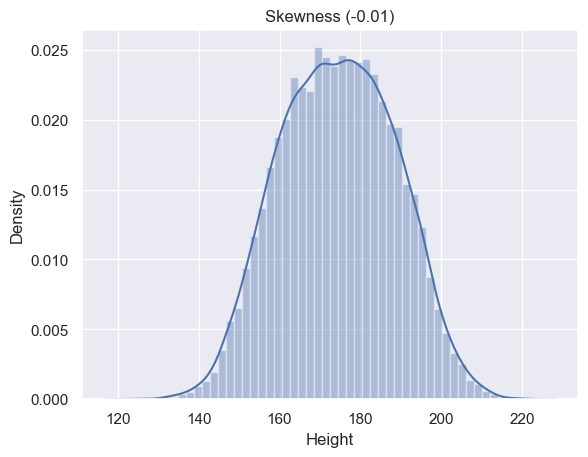

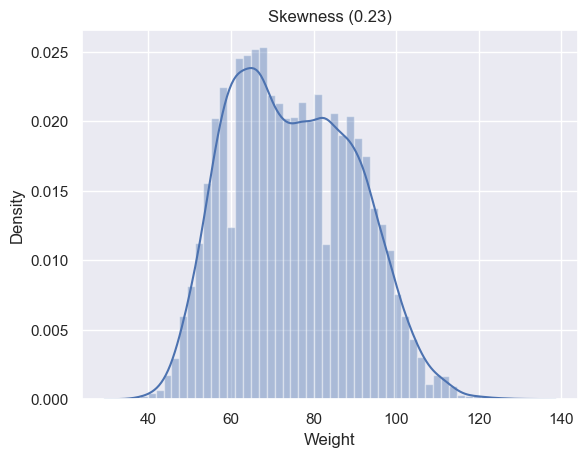

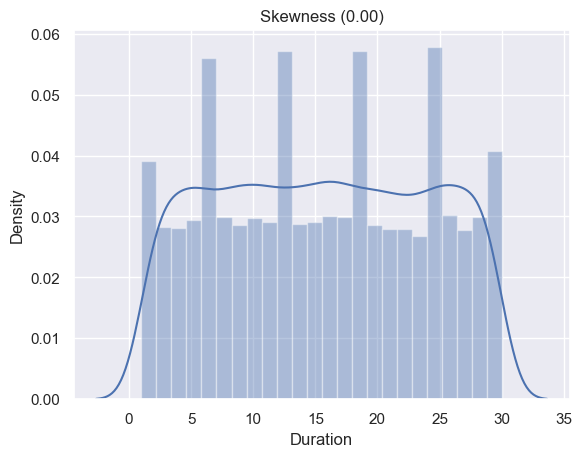

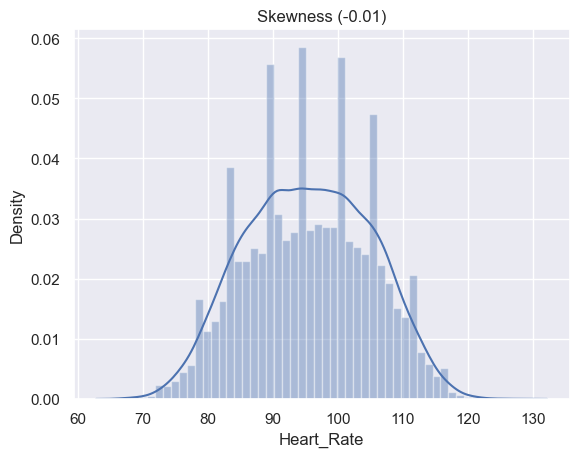

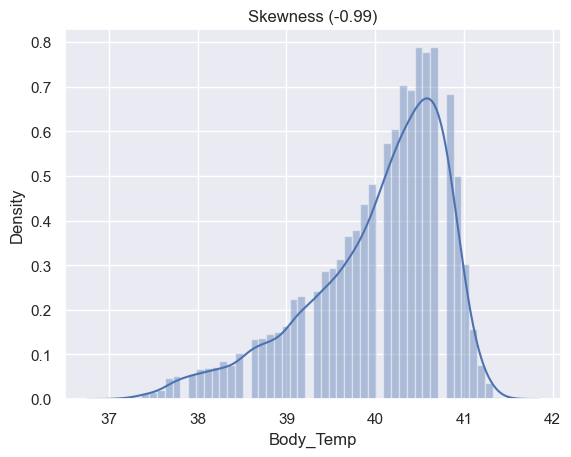

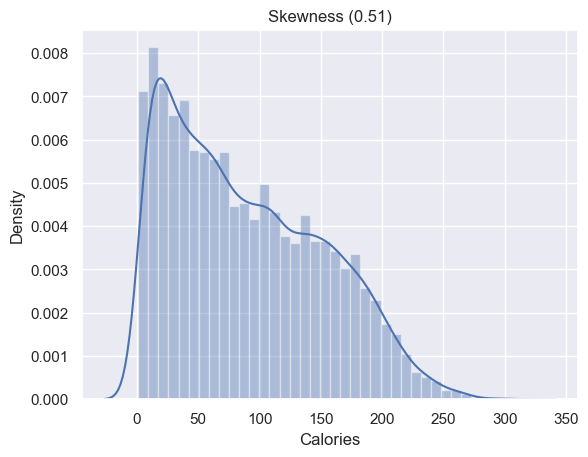

In [19]:
def outlier(col):
    sns.distplot(dataset[col])
    plt.xlabel(col)
    plt.title("Skewness (%0.2f)" %dataset[col].skew())
    plt.show()
    
for col in dataset.select_dtypes(exclude='object').columns:
    outlier(col)

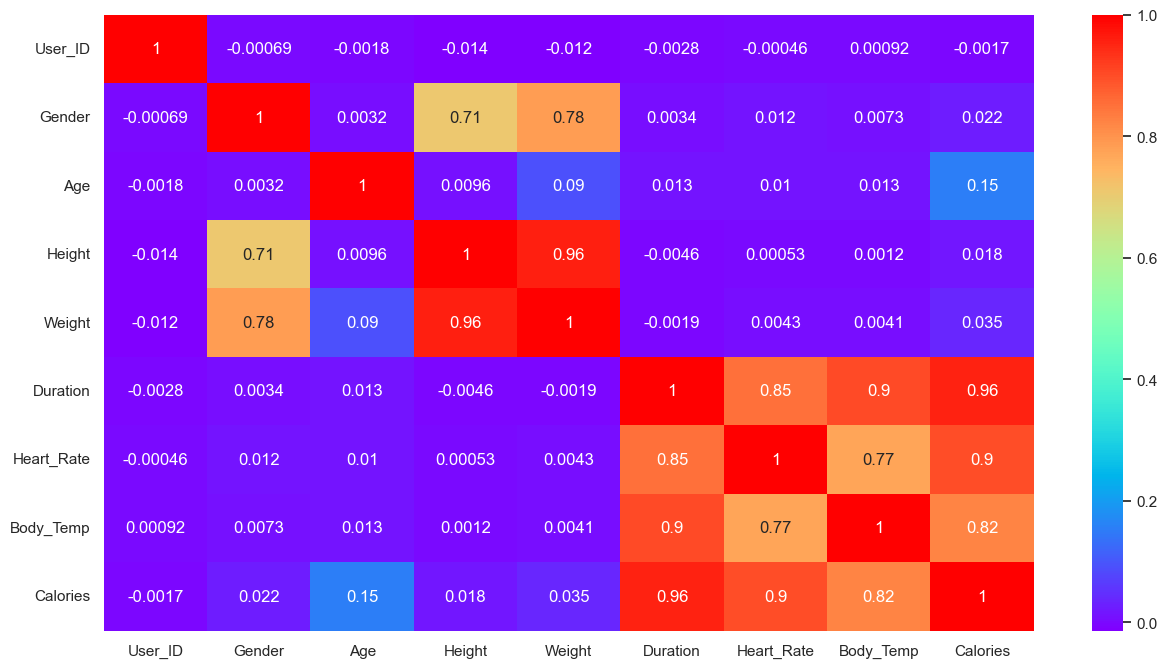

In [80]:
plt.figure(figsize = (15,8))
sns.heatmap(dataset.select_dtypes(exclude='object').corr() , annot=True , cmap = 'rainbow')
plt.show()

In [98]:
x = dataset.iloc[:,1:-1]
y = dataset.iloc[:,-1:]

In [99]:
x

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,29.0,105.0,40.8
1,0,20,166.0,60.0,14.0,94.0,40.3
2,1,69,179.0,79.0,5.0,88.0,38.7
3,0,34,179.0,71.0,13.0,100.0,40.5
4,0,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,11.0,92.0,40.4
14996,0,27,165.0,65.0,6.0,85.0,39.2
14997,0,43,159.0,58.0,16.0,90.0,40.1
14998,1,78,193.0,97.0,2.0,84.0,38.3


In [100]:
y

,Calories
0,231.0
1,66.0
2,26.0
3,71.0
4,35.0
...,...
14995,45.0
14996,23.0
14997,75.0
14998,11.0


In [86]:

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


data = pd.DataFrame()

data['Features'] = x.columns
data['vif'] = [variance_inflation_factor(x.values , i ) for i in range(x.shape[1])] 

data

,Features,vif
0,Gender,2.274184
1,Age,7.204741
2,Height,9.177277


In [85]:
# x.drop(['Weight'] , axis = 1 , inplace = True)

In [123]:
droped_columns = [ "Heart_Rate" , "Body_Temp" , "Weight" , 'Duration']

In [124]:
x.drop(droped_columns , axis = 1 , inplace = True)


In [88]:
x['Gender'] = pd.get_dummies(x['Gender'] , drop_first=True , dtype='int') 

In [125]:
x

,Gender,Age,Height
0,1,68,190.0
1,0,20,166.0
2,1,69,179.0
3,0,34,179.0
4,0,27,154.0
...,...,...,...
14995,0,20,193.0
14996,0,27,165.0
14997,0,43,159.0
14998,1,78,193.0


In [126]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

ols = sm.OLS(y,x)

In [127]:
result = ols.fit()

In [128]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Calories   R-squared (uncentered):                   0.679
Model:                            OLS   Adj. R-squared (uncentered):              0.679
Method:                 Least Squares   F-statistic:                          1.060e+04
Date:                Sun, 23 Jun 2024   Prob (F-statistic):                        0.00
Time:                        01:45:26   Log-Likelihood:                         -83145.
No. Observations:               15000   AIC:                                  1.663e+05
Df Residuals:                   14997   BIC:                                  1.663e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Gender        -4.4708      1.080     -4.139      0.000      -6.588      -2.353
Age            0.5992      0.029     20.363      0.000       0.542       0.657
Height         0.3777      0.009     43.238      0.000       0.361       0.395
==============================================================================
Omnibus:                     1975.944   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              901.542
Skew:                           0.428   Prob(JB):                    1.71e-196
Kurtosis:                       2.158   Cond. No.                         386.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.25 , random_state=3)

In [130]:
x_train.columns , y_train.columns

(Index(['Gender', 'Age', 'Height'], dtype='object'),
 Index(['Calories'], dtype='object'))

In [131]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [132]:
lr_predict_train = lr.predict(x_train)
lr_predict_test = lr.predict(x_test)

In [133]:
from sklearn import metrics

print("r2_score : " , metrics.r2_score(lr_predict_train , y_train))
print("r2_score : " , metrics.r2_score(lr_predict_test , y_test))

r2_score :  -41.664221174412404
r2_score :  -41.047791095111045


In [134]:
print("root_mean_squared_error : " , metrics.root_mean_squared_error(lr_predict_train , y_train))
print("root_mean_squared_error: " , metrics.root_mean_squared_error(lr_predict_test , y_test))

root_mean_squared_error :  61.957958887046914
root_mean_squared_error:  60.90026538189356


<Axes: >

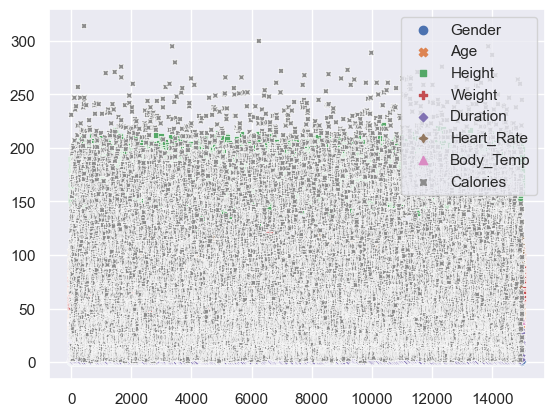

In [135]:
sns.scatterplot(dataset.iloc[:,1:])

In [118]:
dataset.iloc[:,1:]

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,0,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,1,78,193.0,97.0,2.0,84.0,38.3,11.0
